In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## Importing Data and First Check

In [2]:
df = pd.read_csv('cancer_classification.csv')
pd.set_option('display.max_columns', 50)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

In [5]:
df.isnull().sum().any()

False

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## EDA

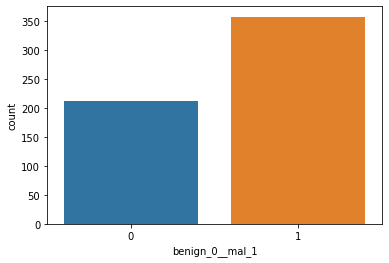

In [7]:
sns.countplot('benign_0__mal_1', data = df);

<AxesSubplot:>

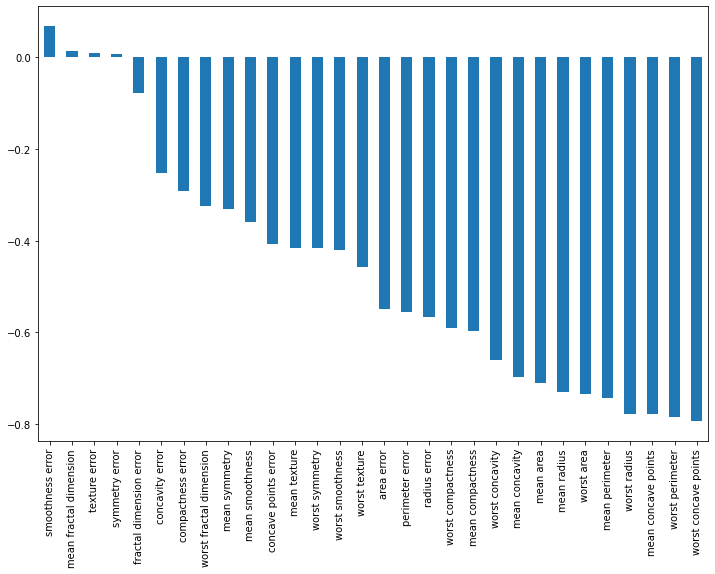

In [8]:
plt.figure(figsize = (12, 8))
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending = False).plot.bar()

<AxesSubplot:>

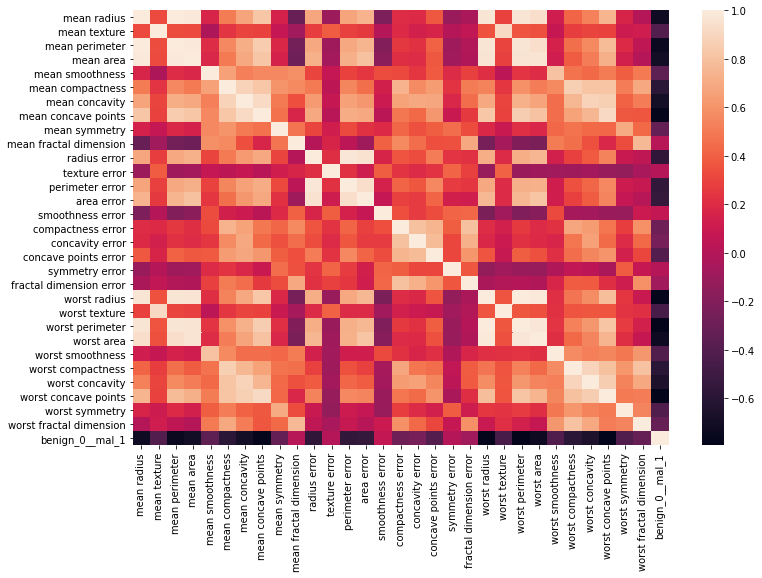

In [9]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr())

## Split and Scale Data

In [10]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [13]:
X_train.shape

(426, 30)

In [14]:
X_train

array([[1.317e+01, 1.822e+01, 8.428e+01, ..., 1.045e-01, 2.235e-01,
        6.925e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02],
       [1.480e+01, 1.766e+01, 9.588e+01, ..., 8.308e-02, 3.600e-01,
        7.285e-02],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

## TF

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(30, input_shape = (30, ), activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))  # sigmoid because it is a classfication problem

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 600)

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6714 - val_loss: 0.6355
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6223 - val_loss: 0.5915
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5768 - val_loss: 0.5439
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5330 - val_loss: 0.5010
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4851 - val_loss: 0.4497
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4385 - val_loss: 0.4041
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3966 - val_loss: 0.3580
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3538 - val_loss: 0.3198
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3172 - val_loss: 0.2845
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2902 - val_loss: 0.2590
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1241
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1333
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1261
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0495 - val_loss: 0.1268
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0490 - val_loss: 0.1305
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.1257
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0504 - val_loss: 0.1293
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1339
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0485 - val_loss: 0.1278
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0478 - val_loss: 0.1300
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0430 - val_loss: 0.1328
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.1418
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.1341
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.1376
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.1389
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.1376
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0364 - val_loss: 0.1378
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.1373
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.1526
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.1420
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1473
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0246 - val_loss: 0.1612
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.1563
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.1586
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.1527
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0258 - val_loss: 0.1464
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.1595
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1495
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.1618
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.1479
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.1790
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.1707
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.1773
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.1700
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.1819
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.1790
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.1817
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.1646
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.1728
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.1995
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0114 - val_loss: 0.2024
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.2448
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.1959
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.1875
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.2333
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.1967
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.2101
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.2186
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.1864
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.2737
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2364
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2973
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.2119
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.2634
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.2314
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2233
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.2647
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.2313
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.2387
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.2284
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.2613
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.2992
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.2623
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.3217
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.2799
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2984
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2959
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.2945
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.2778
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.3182
Epoc

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

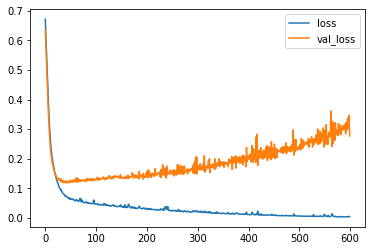

In [24]:
losses.plot()

#### There is an overfitting so we are creating our model again with early stop to prevent overfitting.

In [25]:
model = Sequential()

model.add(Dense(30, input_shape = (30, ), activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))  # sigmoid because it is a classfication problem

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [28]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 600,
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7132 - val_loss: 0.6911
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6810 - val_loss: 0.6641
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6545 - val_loss: 0.6412
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6285 - val_loss: 0.6111
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5952 - val_loss: 0.5735
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5568 - val_loss: 0.5326
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5154 - val_loss: 0.4866
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4693 - val_loss: 0.4374
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4229 - val_loss: 0.3890
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3791 - val_loss: 0.3425
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.0868
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0573 - val_loss: 0.0890
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0853
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0533 - val_loss: 0.0925
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0871
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0886
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0934
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0971
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0877
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0893
Epoch 93/600


In [29]:
losses = pd.DataFrame(model.history.history)

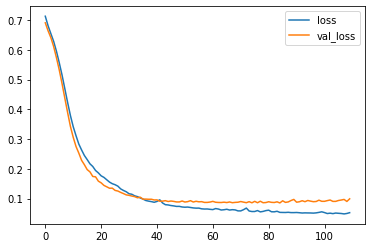

In [30]:
losses.plot();

#### We are creating our model again. This time we will use Dropout to prevent overfitting.

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()

model.add(Dense(30, input_shape = (30, ), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))  # sigmoid because it is a classfication problem

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [33]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 600,
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.7039 - val_loss: 0.6751
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6681 - val_loss: 0.6633
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6603 - val_loss: 0.6453
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6514 - val_loss: 0.6201
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6226 - val_loss: 0.6006
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6243 - val_loss: 0.5777
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5993 - val_loss: 0.5552
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5769 - val_loss: 0.5273
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5636 - val_loss: 0.5024
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5438 - val_loss: 0.4769
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.1229 - val_loss: 0.0791
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1299 - val_loss: 0.0800
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1098 - val_loss: 0.0775
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1167 - val_loss: 0.0894
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0990 - val_loss: 0.0810
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1095 - val_loss: 0.0875
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1079 - val_loss: 0.0872
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1087 - val_loss: 0.0731
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1177 - val_loss: 0.0823
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0996 - val_loss: 0.0837
Epoch 93/600


In [34]:
losses = pd.DataFrame(model.history.history)

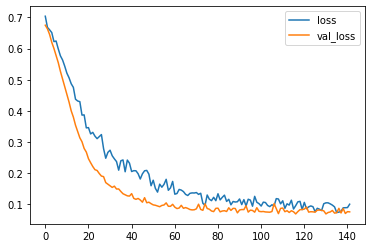

In [35]:
losses.plot();

## Evaluation

In [36]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [40]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
